In [1]:
from astropy.io import fits
from astropy.wcs import WCS as WCS
from mocpy import MOC
from astropy.visualization import simple_norm
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load 2MASS cutout covering the galactic plane
hdu = fits.open('http://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2F2MASS%2FK&width=1200&height=700&fov=30&projection=TAN&coordsys=galactic&rotation_angle=0.0&object=gal%20center&format=fits')

In [3]:
# load Spitzer MOC
moc = MOC.from_fits('http://skies.esac.esa.int/Spitzer/IRAC1_bright_ISM/Moc.fits')

In [4]:
# create WCS from 2MASS image header
twomass_wcs = WCS(header=hdu[0].header)

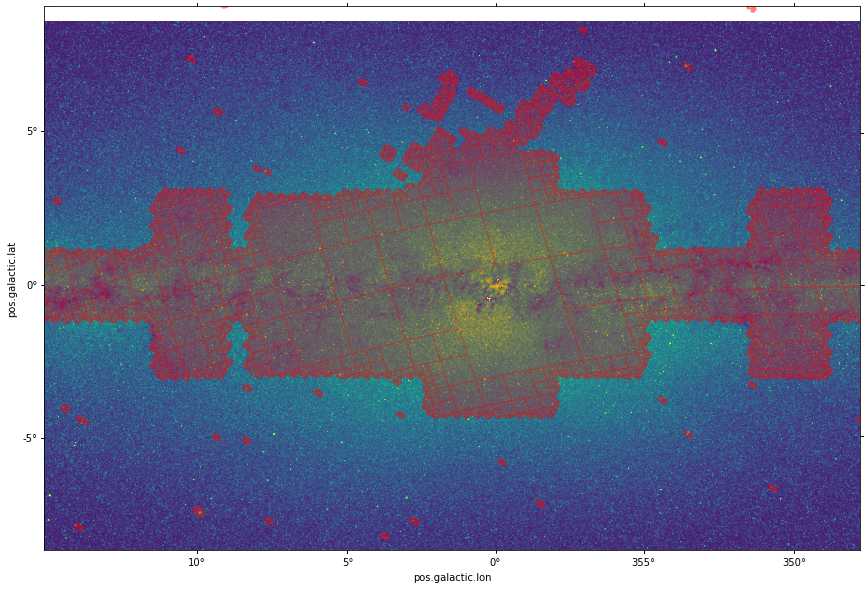

In [5]:
fig = plt.figure(111, figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=twomass_wcs)
moc.fill(ax=ax, wcs=twomass_wcs, alpha=0.3, color='red')
im = ax.imshow(hdu[0].data, origin='lower', norm=simple_norm(hdu[0].data, 'sqrt'), vmin=-1, vmax=150)


In [6]:
# compute skycoords for every pixel of the image
width = hdu[0].header['NAXIS1']
height = hdu[0].header['NAXIS2']

xv, yv = np.meshgrid(np.arange(0, width), np.arange(0, height))
skycoords = twomass_wcs.pixel_to_world(xv, yv)

In [7]:
ra, dec = skycoords.icrs.ra.deg, skycoords.icrs.dec.deg

In [8]:
mask_in_moc = moc.contains(ra * u.deg, dec * u.deg)

In [9]:
img = hdu[0].data
img_test = img.copy()

img_test[~mask_in_moc] = 0

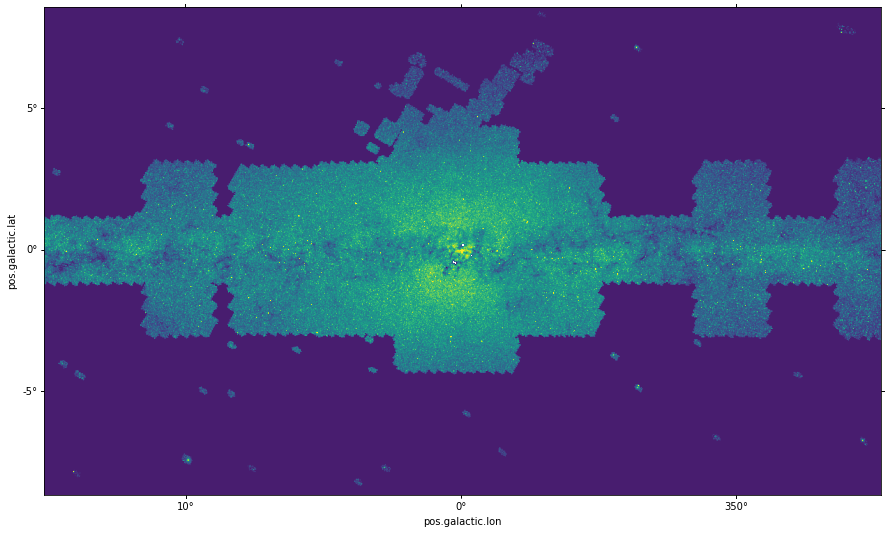

In [10]:
fig = plt.figure(111, figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=twomass_wcs)

im = ax.imshow(img_test, origin='lower', norm=simple_norm(hdu[0].data, 'sqrt'), vmin=-1, vmax=150)


In [11]:
# somme des pixels dans le mask
np.sum(img[mask_in_moc])

8161844

In [12]:
# somme des pixels dans toute l'image
np.sum(img)

13534162